In [240]:
import yfinance as yf
import pandas as pd
from fred import Fred_Pull

import matplotlib.pyplot as plt

In [241]:
# #   YFinance Pull
# gold_price = yf.Ticker("GC=F")
# gold_price = (
#     gold_price.history(period='max')
#     .drop(['Open','High','Low','Volume','Dividends','Stock Splits'],axis=1)
#         .assign(
#         Close=lambda df: pd.to_numeric(df['Close'])
#     )
#     .rename(columns={'Close':'gold_nomusd'})
#     .resample('ME').mean()
# )

# gold_price.index = gold_price.index.tz_localize(None).rename('date')

In [242]:
# CSV

gold_price = (
    pd.read_csv('./CSV_Data/gold_usd_data.csv')
    .assign(
        date=lambda df: pd.to_datetime(df['date'],dayfirst=True),
        value=lambda df: pd.to_numeric(df['value'])
    )
    .set_index('date')
    .rename(columns={'value':'gold_nomusd'})
    .resample('ME').mean()
)

In [243]:
# Pull US CPI and US 10YR Yield (Real) from Fred

us_cpi = Fred_Pull('CPIAUCSL','899901ba06f09b9961a73113b1834a15').extract(month_average=True)
us_realyield = Fred_Pull('REAINTRATREARAT10Y','899901ba06f09b9961a73113b1834a15').extract(month_average=True)

In [244]:
df = (
    gold_price.join((us_cpi,us_realyield))
    .assign(
        CPIAUCSL = lambda x: 1/(x.CPIAUCSL/x.CPIAUCSL.iloc[0]),
        gold_realusd = lambda x: x.gold_nomusd*x.CPIAUCSL)
)

In [245]:
df=df[df.REAINTRATREARAT10Y.notna()]

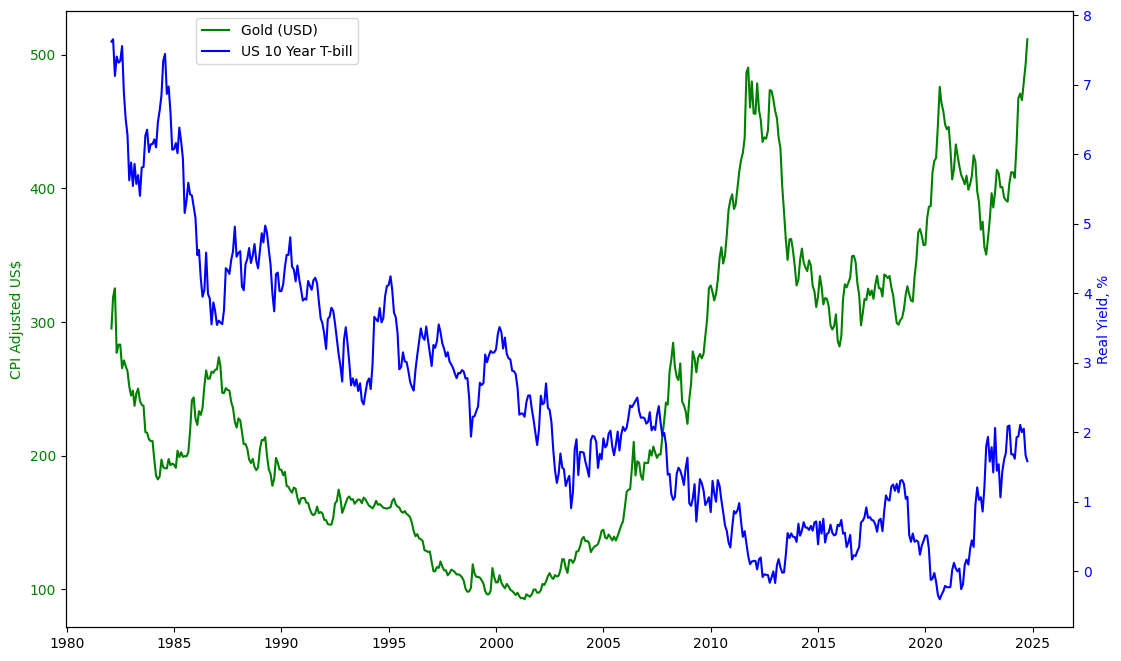

In [254]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (13,8)

ax1.plot(df.index, df.gold_realusd, 'g-', label='Gold (USD)')
ax1.set_ylabel('CPI Adjusted US$', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.plot(df.index, df.REAINTRATREARAT10Y, 'b-', label='US 10 Year T-bill')
ax2.set_ylabel('Real Yield, %', color='b')    
ax2.tick_params(axis='y', labelcolor='b')

fig.legend(loc="upper left", bbox_to_anchor=(0.22,0.88))

# Show the plot

plt.show()

In [255]:
bins = [1982,2008,2021,2025]   # Year ranges (you can adjust these)
labels = ['1982-2007 (Pre-QE)', '2008-2020 (Post-GFC)', '2021-2024 (Post-COVID)']

colors = {
    '1982-2007 (Pre-QE)': 'green',
    '2008-2020 (Post-GFC)': 'orange',
    '2021-2024 (Post-COVID)': 'red',
}

df['YearRange'] = pd.cut(df.index.year,bins=bins,labels=labels,right=False)

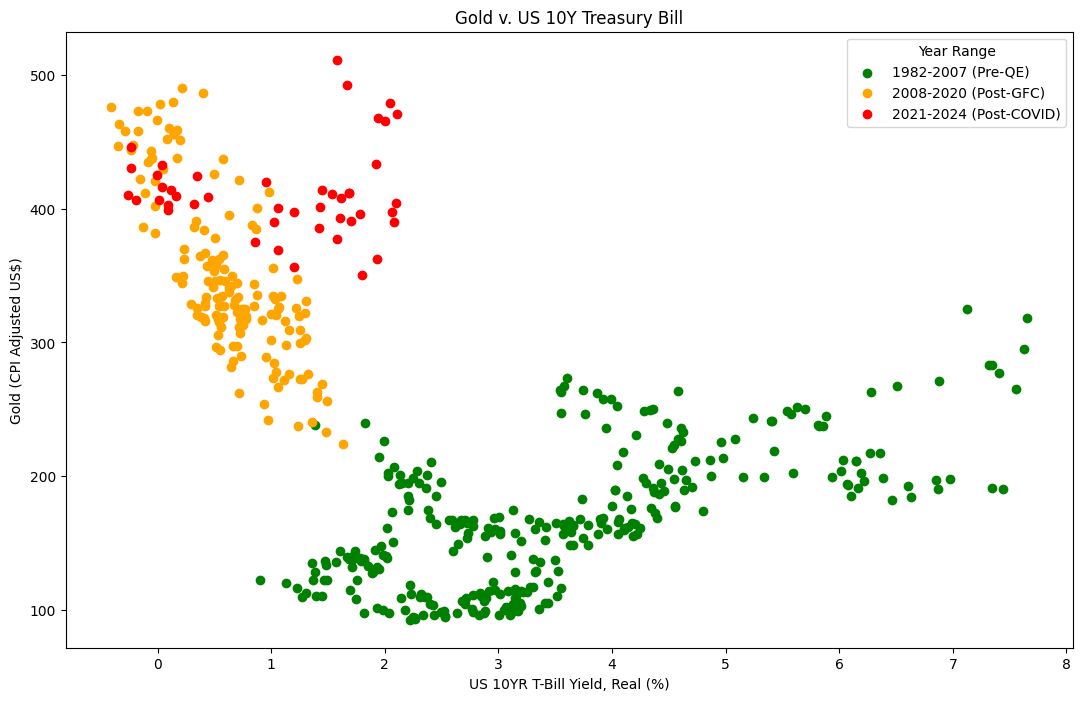

In [258]:
for label in labels:
    subset = df[df['YearRange'] == label]
    plt.scatter(subset.REAINTRATREARAT10Y, subset.gold_realusd, color=colors[label], label=label)

# Add labels, title, and legend
plt.xlabel('US 10YR T-Bill Yield, Real (%)')
plt.ylabel('Gold (CPI Adjusted US$)')
plt.title('Gold v. US 10Y Treasury Bill')
plt.legend(title='Year Range')

# Show the plot
plt.show()

In [222]:
bins

[1975, 1985, 1995, 2005, 2015, 2025]

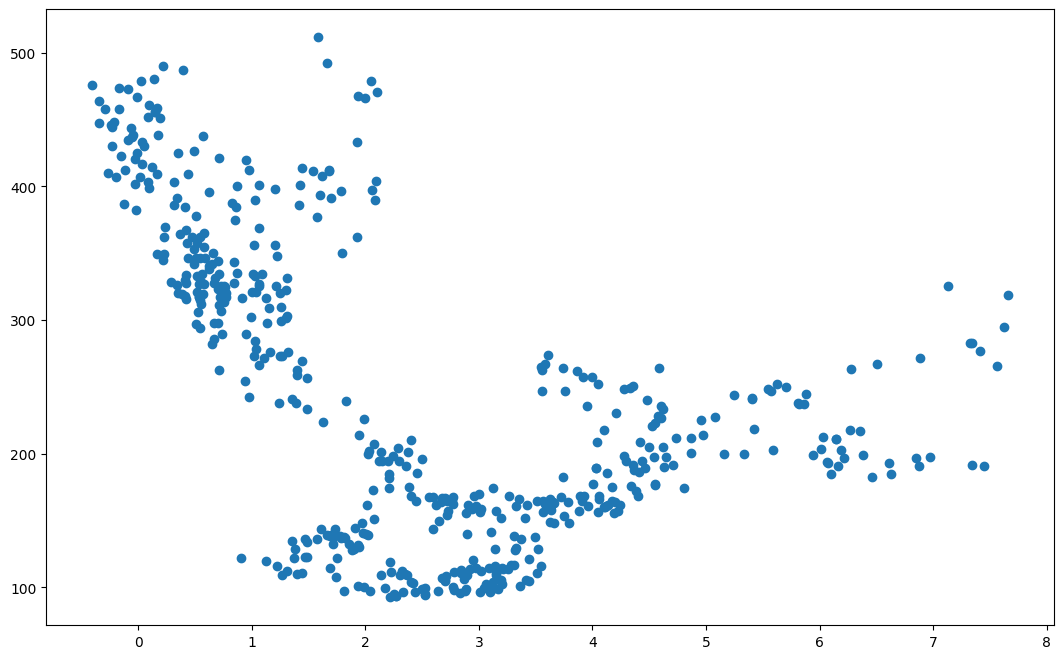

In [223]:


fig, ax1 = plt.subplots()

plt.scatter(df.REAINTRATREARAT10Y,df.gold_realusd)



In [224]:
post_cov=merged.loc[merged.index.year>2019]

KeyError: 'real_rate'

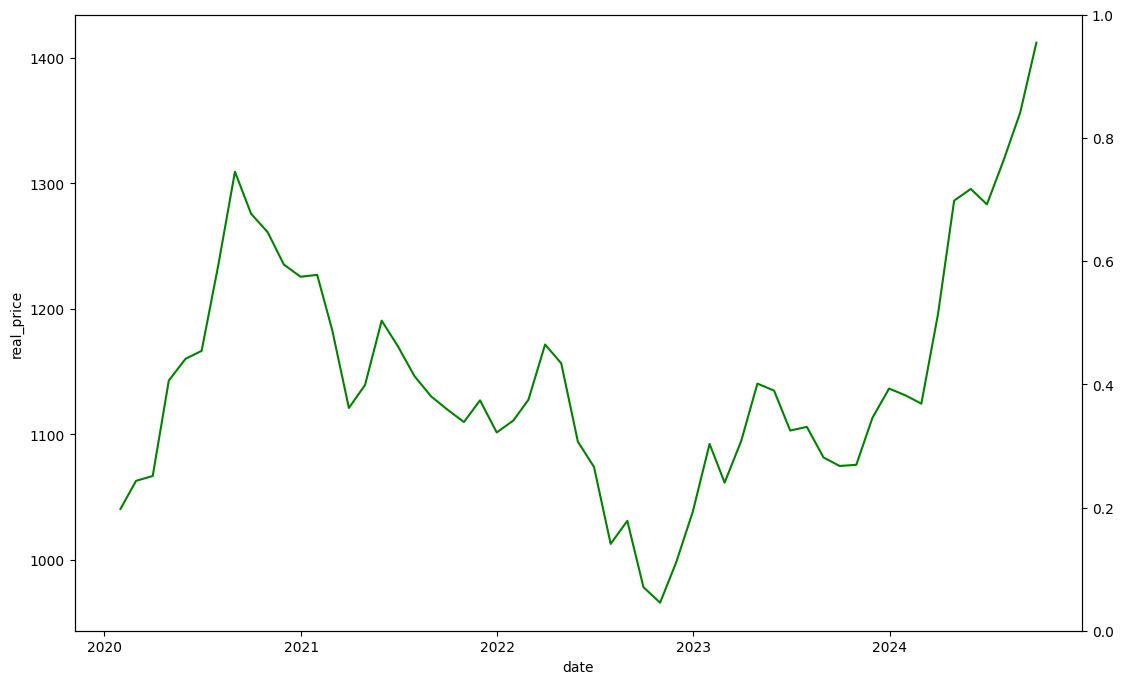

In [225]:
import matplotlib.pyplot as plt
sns.lineplot(data=post_cov['real_price'], color="g")
ax2 = plt.twinx()
sns.lineplot(data=post_cov['real_rate'], color="b", ax=ax2)

#sns.lineplotplot(post_cov,x='real_rate',y='real_price')

<Axes: xlabel='real_rate', ylabel='real_price'>

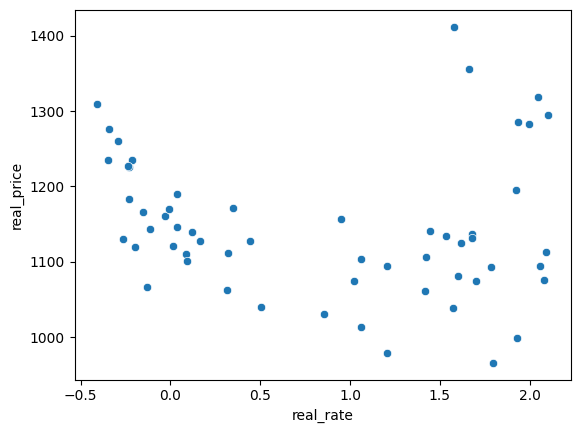

In [12]:
sns.scatterplot(post_cov,x='real_rate',y='real_price')